In [6]:
import os
os.chdir(r'C:\Users\sokin\Documents\Zoocamp\Homework-3')
os.getcwd()

'C:\\Users\\sokin\\Documents\\Zoocamp\\Homework-3'

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score,mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge

%matplotlib inline
sns.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [21]:
price = pd.read_csv('car-price.csv', sep=',')
price.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Data preparation

In [410]:
price.columns = price.columns.str.replace(' ', '_').str.lower()
price = price.rename(columns={'msrp':'price'})

In [411]:
price.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'price'],
      dtype='object')

In [412]:
data = price[['make','model','year','engine_hp','engine_cylinders','transmission_type','vehicle_style','highway_mpg','city_mpg','price']]
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [413]:
null_idx = data[(data['engine_cylinders'].isnull()) | (data['engine_hp'].isnull())].index

In [414]:
data.iloc[null_idx].head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
539,FIAT,500e,2015,NaN,0.0,DIRECT_DRIVE,2dr Hatchback,108,122,31800
540,FIAT,500e,2016,NaN,0.0,DIRECT_DRIVE,2dr Hatchback,103,121,31800
541,FIAT,500e,2017,NaN,0.0,DIRECT_DRIVE,2dr Hatchback,103,121,31800
1983,Chevrolet,Bolt EV,2017,200.0,NaN,DIRECT_DRIVE,4dr Hatchback,110,128,40905
1984,Chevrolet,Bolt EV,2017,200.0,NaN,DIRECT_DRIVE,4dr Hatchback,110,128,36620


In [415]:
data.fillna(0, inplace=True)
print(data.isna().sum())
data.iloc[null_idx]

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
539,FIAT,500e,2015,0.0,0.0,DIRECT_DRIVE,2dr Hatchback,108,122,31800
540,FIAT,500e,2016,0.0,0.0,DIRECT_DRIVE,2dr Hatchback,103,121,31800
541,FIAT,500e,2017,0.0,0.0,DIRECT_DRIVE,2dr Hatchback,103,121,31800
1983,Chevrolet,Bolt EV,2017,200.0,0.0,DIRECT_DRIVE,4dr Hatchback,110,128,40905
1984,Chevrolet,Bolt EV,2017,200.0,0.0,DIRECT_DRIVE,4dr Hatchback,110,128,36620
...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,0.0,0.0,DIRECT_DRIVE,Wagon,92,120,35700
9851,Kia,Soul EV,2015,0.0,0.0,DIRECT_DRIVE,Wagon,92,120,33700
9852,Kia,Soul EV,2016,0.0,0.0,DIRECT_DRIVE,Wagon,92,120,33950
9853,Kia,Soul EV,2016,0.0,0.0,DIRECT_DRIVE,Wagon,92,120,31950


# Question 1

In [416]:
# method 1
data.transmission_type.value_counts()

# method 2
# data.transmission_type.mode()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

#### the most frequent observation (mode) for the column transmission_type is AUTOMATIC           

# Question 2


In [417]:
numerical = list(data.select_dtypes('number').columns)

In [418]:
corr_matrix = data[numerical].corr()
# corr_matrix

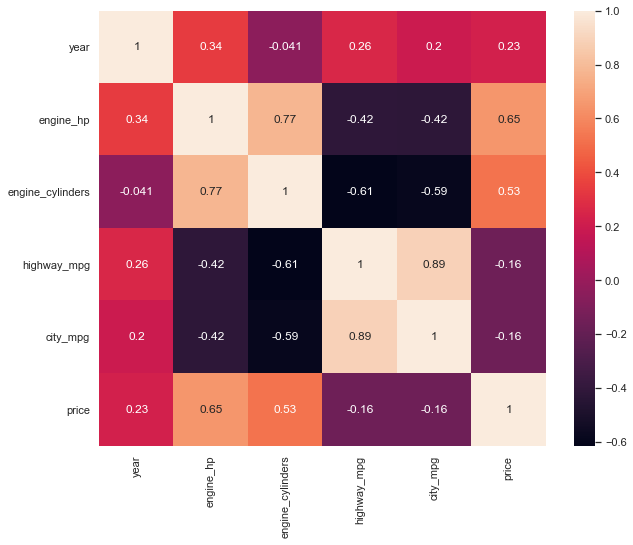

In [419]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [420]:
# Stack the correlation matrix
stacked_corr = corr_matrix.stack()

# Select the highest correlation pairs
highest_corr_pairs = stacked_corr.nlargest(len(numerical)**2)

# Print the highest correlation pairs
highest_corr_pairs[highest_corr_pairs<1]

city_mpg          highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
price             engine_hp           0.650095
engine_hp         price               0.650095
engine_cylinders  price               0.526274
price             engine_cylinders    0.526274
engine_hp         year                0.338714
year              engine_hp           0.338714
                  highway_mpg         0.258240
highway_mpg       year                0.258240
year              price               0.227590
price             year                0.227590
year              city_mpg            0.198171
city_mpg          year                0.198171
engine_cylinders  year               -0.040708
year              engine_cylinders   -0.040708
price             city_mpg           -0.157676
city_mpg          price              -0.157676
highway_mpg       price              -0.160043
price        

#### features that have the biggest correlation in this dataset: city_mpg and highway_mpg 

### Make price binary

In [421]:
mean_price = data.price.mean()

In [422]:
data['above_average'] = [1 if x > mean_price else 0 for x in data.price]

In [423]:
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


### Split the data
Split your data in train/val/test sets with 60%/20%/20% distribution.\
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.\
Make sure that the target value (above_average) is not in your dataframe.

In [424]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)


In [425]:
df_train.shape[0]/len(data), df_val.shape[0]/len(data), df_test.shape[0]/len(data)

(0.5999664260533826, 0.2000167869733087, 0.2000167869733087)

# Question 3

In [426]:
# data['above_average']
categorical = list(df_train.select_dtypes('O'))

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_train['above_average'])

mi = round(df_train[categorical].apply(mutual_info_churn_score),2)
mi.sort_values(ascending=False)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

#### transmission_type has the lowest mutual information score

In [427]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

# del df_train['above_average']
# del df_val['above_average']
# del df_test['above_average']

df_train.drop(['above_average', 'price'], axis=1, inplace=True)
df_val.drop(['above_average', 'price'], axis=1, inplace=True)
df_test.drop(['above_average', 'price'], axis=1, inplace=True)

# Question 4

In [428]:
# for col in data[categorical].columns:
#      print('##############################')
#      print(data[col].value_counts())
   

In [429]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [430]:
X_train.shape,y_train.shape, X_val.shape, y_val.shape,

((7148, 943), (7148,), (2383, 943), (2383,))

In [432]:
lr = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print('Accuracy score:', np.round(accuracy_score(y_val, y_pred),8))

Accuracy score: 0.944188


#### accuracy score: ~95%

# Question 5

Let's find the least useful feature using the feature elimination technique.\
Train a model with all these features (using the same parameters as in Q4).\
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.\
For each feature, calculate the difference between the original accuracy and the accuracy without the feature

In [436]:
score={}

for feature in list(df_train.columns):
    print('>>>>>>>> excluding feature:',feature)
    
    dt_train = df_train.drop(feature, axis=1)
    dt_val = df_val.drop(feature, axis=1)
    
    dv = DictVectorizer(sparse=False)
    train_dict = dt_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = dt_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    lr = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    acc = np.round(accuracy_score(y_val, y_pred),2)
    diff = np.round(np.abs(0.944188-acc),6) # accuracy of Q4 model= 0.95
    
    score[feature] = diff
#     score['score'] = acc
#     score['difference'] = diff
    
    print(f'Without feature:{feature} -> accuracy score:{acc}')
    print(f'Without feature:{feature} -> difference with initial score:{diff}')
    print('\n')

>>>>>>>> excluding feature: make
Without feature:make -> accuracy score:0.93
Without feature:make -> difference with initial score:0.014188


>>>>>>>> excluding feature: model
Without feature:model -> accuracy score:0.92
Without feature:model -> difference with initial score:0.024188


>>>>>>>> excluding feature: year
Without feature:year -> accuracy score:0.95
Without feature:year -> difference with initial score:0.005812


>>>>>>>> excluding feature: engine_hp
Without feature:engine_hp -> accuracy score:0.92
Without feature:engine_hp -> difference with initial score:0.024188


>>>>>>>> excluding feature: engine_cylinders
Without feature:engine_cylinders -> accuracy score:0.95
Without feature:engine_cylinders -> difference with initial score:0.005812


>>>>>>>> excluding feature: transmission_type
Without feature:transmission_type -> accuracy score:0.94
Without feature:transmission_type -> difference with initial score:0.004188


>>>>>>>> excluding feature: vehicle_style
Without featu

In [437]:
sorted(score.items(), key=lambda x:x[1])

[('transmission_type', 0.004188),
 ('vehicle_style', 0.004188),
 ('year', 0.005812),
 ('engine_cylinders', 0.005812),
 ('highway_mpg', 0.005812),
 ('city_mpg', 0.005812),
 ('make', 0.014188),
 ('model', 0.024188),
 ('engine_hp', 0.024188)]

# Question 6

In [362]:
data['log_1p_price'] = np.log1p(data.price)
data.drop(['price', 'above_average'], axis=1, inplace=True)

In [393]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

y_train = df_train.log_1p_price.values
y_val = df_val.log_1p_price.values
y_test = df_test.log_1p_price.values

# del df_train['above_average']
# del df_val['above_average']
# del df_test['above_average']

del df_train['log_1p_price']
del df_val['log_1p_price']
del df_test['log_1p_price']

In [395]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

# # # ridge_score={}
for a in [0, 0.01, 0.1, 1, 10]: 
    r = Ridge(alpha=a, solver='sag', random_state=42)
    r.fit(X_train, y_train)
    y_pred = r.predict(X_val)
    rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 3)
    print(f'Alpha parameter:{a}, gives RMSE:{rmse}')


Alpha parameter:0, gives RMSE:0.487
Alpha parameter:0.01, gives RMSE:0.487
Alpha parameter:0.1, gives RMSE:0.487
Alpha parameter:1, gives RMSE:0.487
Alpha parameter:10, gives RMSE:0.487
